# Spectrograms of transients

This tutorial shows a few examples of transients that may be found in LIGO data.

Below, for each transient type:

1. Find the data file in the O1 data set that corresponds to the GPS time
 1. Hint: See https://losc.ligo.org/archive/O1/
1. Download the data file
1. Read in the data file, and plot a spectrogram of 200 ms of whitened data around the transient
1. Describe what you see in the spectrogram


Possible ways to make a spectrogram of whitened data include:
* Example with gwpy (Q-scan): https://gwpy.github.io/docs/latest/examples/timeseries/qscan.html
* Example using matplotlib (Quickview): http://beta.mybinder.org/repo/losc-tutorial/quickview 
 * Quickview code at https://github.com/losc-tutorial/quickview
* Use https://qscan.ligo.org (no code required)

### Imports and set-up

In [1]:
# Standard python numerical analysis imports:
#!pip install gwpy
import numpy as np
from scipy import signal
from scipy.interpolate import interp1d
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz
import h5py
import json
import sys

pyversion = sys.version_info.major
if pyversion == 2: 
    import urllib2
else:
    import urllib.request
    
import os
from gwpy.timeseries import TimeSeries

# the IPython magic below must be commented out in the .py file, since it doesn't work there.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

### Define a handy function for data downloads

In [2]:
try: os.mkdir('./data')
except: pass

# -- Handy function to download data file, and return the filename
def download(url):
    filename = os.path.join('data', url.split('/')[-1])
    print('Downloading ' + url )
    if pyversion == 2: 
        r = urllib2.urlopen(url).read()
        f = open(filename, 'w')   # write it to the right filename
        f.write(r)
        f.close()
    else:
        urllib.request.urlretrieve(url, filename)  
    print("File download complete")
    return filename

## Hardware Injections

LIGO data includes simulated signals known as hardware injections.

1. See the O1 hardware injection page: https://losc.ligo.org/o1_inj/
1. Find a CBC injection with SNR > 30
1. Download the data file, and make a spectrogram of the whitened data

#### Question:
* Describe what you seen in the spectrogram:

#### To help get started, we'll show you this one using gwpy

In [3]:
## Make a spectrogram of a hardware injection
gps_inj = 1128668183
url_inj = 'https://losc.ligo.org/archive/data/O1/1128267776/H-H1_LOSC_4_V1-1128665088-4096.hdf5'
fn_inj = download(url_inj)

File download complete


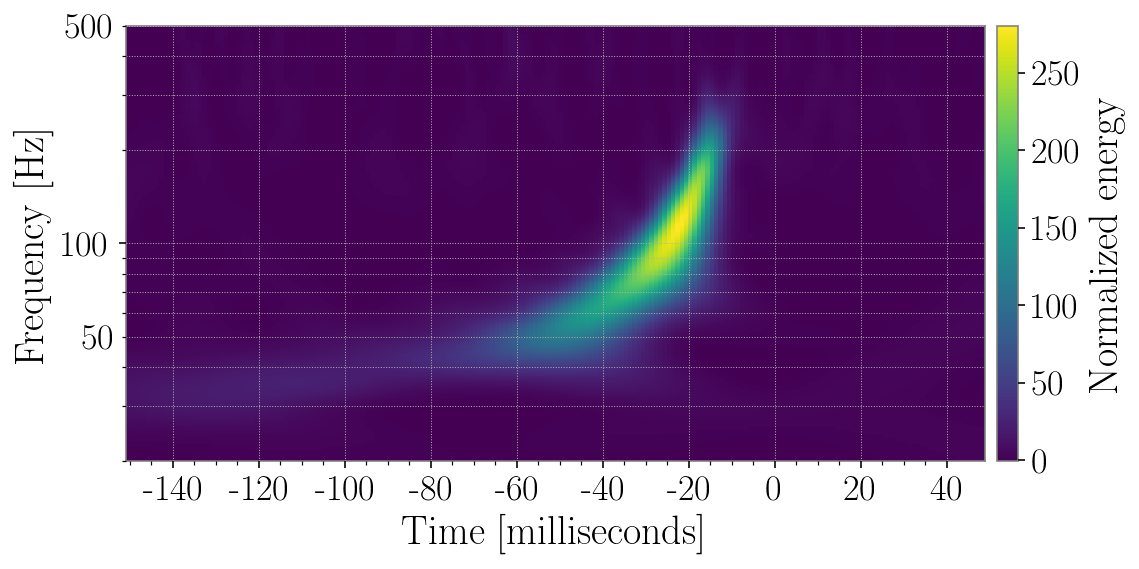

In [4]:
gps = gps_inj
fn = fn_inj
inj_data = TimeSeries.read(fn, format='hdf5.losc', start=gps-16, end=gps+16)
# -- Follow example at https://gwpy.github.io/docs/stable/examples/timeseries/qscan.html
plot = inj_data.q_transform().crop(gps-.15, gps+.05).plot(figsize=[8, 4])
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.set_xlabel('Time [milliseconds]')
ax.set_ylim(20, 500)
ax.grid(True, axis='y', which='both')
plot.add_colorbar(cmap='viridis', label='Normalized energy')

## Binary Black Hole Merger: GW150914

1. Find the GPS time of GW150914
 * Hint: https://losc.ligo.org/events/
1. Download a data file containing this time
1. Plot a spectrogram of whitened data around this time

#### Question:
* Describe what you seen in the spectrogram:

In [5]:
#-- GW150914
# gps_bbh = XXX
# url_bbh = XXX
# fn = download(url_bbh)

## Koi Fish Glitch

"Glitches" are transient instrumental artifacts in the data.  Glitches may be classified by their time-frequency properties and/or cause.  One class of glitches is known as "Koi Fish"

1. A Koi Fish glitch occurs in Hanford data at GPS 1132401286.330
1. Find and download the corresponding data file from O1
1. Make a spectrogram of the whitened data around this event

#### Question:
* Describe what you seen in the spectrogram:


In [6]:
# -- Koi fish glitch
#gps_koi = 1132401286.330
#url_koi = 'https://losc.ligo.org/archive/data/O1/1131413504/H-H1_LOSC_4_V1-1132400640-4096.hdf5'
#fn_koi = download(url)

## Scratchy glitch

Another category of glitches are known as "Scratchy Glitches".

1. A Scratchy glitch occurs in Hanford data at GPS 1128779800.440
2. Find the corresponding data file and download it
3. Plot a spectrogram of the whitened data around this time

#### Question:
* Describe what you seen in the spectrogram:

In [7]:
# -- Scratchy glitch
#gps_scratch = 1128779800.440
#url_scratch = 'https://losc.ligo.org/archive/data/O1/1128267776/H-H1_LOSC_4_V1-1128779776-4096.hdf5'
#fn_scratch = download(url)